In [2]:
# Import Libraries
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [19]:
import extract_to_mongodb as etm
import db_utils as dbu

In [22]:
collection_name = os.getenv('COLLECTION_NAME_CLEANED')
naturalearth_lowres = os.getenv('NATURALEARTH_SHAPEFILE_PATH')

Load the Data

In [6]:
# Load the cleaned data
geo_wfp = dbu.load_data_from_mongodb(collection_name)

In [7]:
geo_wfp.head(5)

_id      lat       lon                 rep_date  \
0  6669b15b44a41007063ba9da  62.1163 -161.8260  2020/06/02 12:54:00.000   
1  6669b15e44a41007063ba9db  61.6291 -164.4490  2020/06/11 12:36:00.000   
2  6669b15e44a41007063ba9dc  47.4740  -69.9380  2020/06/20 06:30:00.000   
3  6669b15e44a41007063ba9dd  32.3920 -110.8040  2020/06/22 08:24:00.000   
4  6669b15e44a41007063ba9de  33.4720  -91.3332  2020/06/13 07:06:00.000   

  source sensor satellite agency    temp  rh  ...  cfb  pcuring  greenup  \
0  NASA4  IBAND     S-NPP    UAK  15.917  69  ...  0.0     50.0      1.0   
1  NASA5  IBAND   NOAA-20    UAK  26.064  52  ...  0.0     50.0      1.0   
2   USFS  IBAND     JPSS1     QC  24.666  54  ...  0.0     29.0      1.0   
3  NASA6  IBAND     S-NPP    UAZ  32.754  11  ...  0.0     50.0      1.0   
4  NASA7  IBAND   NOAA-20    UAR  31.359  37  ...  0.0     50.0      1.0   

   elev       sfl       cfl  tfc0  ecozone  sfc0                  geometry  
0    90  1.011450  0.000000  0.35        2  0.35  POINT (-161.826 62.1163)  
1    24  0.435360  0.000000  0.10        2  0.10  POINT (-164.449 61.6291)  
2    27 -1.000000  0.000000  1.36           1.36    POINT (-69.938 47.474)  
3  1534  0.212800  0.000530  0.35       12  0.35   POINT (-110.804 32.392)  
4    38  0.102444  0.000499  0.35        8  0.35   POINT (-91.3332 33.472)  

[5 rows x 35 columns]

In [8]:
print("\nDescribe the GeoDataFrame:")
geo_wfp.describe()


Describe the GeoDataFrame:


lat            lon           temp             rh  \
count  450342.000000  450342.000000  450342.000000  450342.000000   
mean       47.087916    -110.010441      23.058456      36.686720   
std        11.865684      18.039074       7.093647      15.424503   
min        25.000200    -165.826004     -45.268002       0.000000   
25%        36.105900    -120.730756      19.127000      26.000000   
50%        50.065950    -110.498692      23.712999      35.000000   
75%        56.220001     -96.537003      27.944000      46.000000   
max        70.558000     -52.985000      48.426000      99.000000   

                  ws             wd            pcp           ffmc  \
count  450342.000000  450342.000000  450342.000000  450342.000000   
mean       13.956673     196.807948       0.534137      89.126303   
std         5.922645      95.635528       2.785133       7.647873   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.661250     135.000000       0.000000      87.086998   
50%        12.803000     210.000000       0.002000      90.649002   
75%        16.996000     271.000000       0.122000      93.303001   
max        93.580002     360.000000      96.686000      99.000000   

                 dmc             dc  ...           bfc            hfi  \
count  450342.000000  450342.000000  ...  2.391320e+05  450339.000000   
mean       95.263200     417.016640  ...  1.008699e+02    6332.695520   
std        97.460619     275.853409  ...  1.782908e+04   10020.813765   
min         0.000000       0.000000  ...  0.000000e+00       0.000000   
25%        34.110250     214.916752  ...  3.500000e-01     253.000000   
50%        68.554001     381.701996  ...  1.419560e+00    2359.000000   
75%       112.562752     546.989990  ...  4.627730e+00    8987.000000   
max       909.347000    2707.040000  ...  5.890072e+06  236169.000000   

                 cfb        pcuring       greenup           elev  \
count  450339.000000  425990.000000  425990.00000  450342.000000   
mean       31.308437      49.936846       0.72128     701.436197   
std        40.854987      31.819724       0.44837     657.176444   
min         0.000000       0.000000       0.00000      -1.000000   
25%         0.000000      25.000000       0.00000     264.000000   
50%         0.000000      50.000000       1.00000     424.000000   
75%        78.000000      75.000000       1.00000    1021.000000   
max       100.000000     100.000000       1.00000    3558.000000   

                 sfl            cfl           tfc0           sfc0  
count  450342.000000  450342.000000  450339.000000  450339.000000  
mean        9.556830       0.371298       2.151030       1.878887  
std        15.913778       0.620658       1.849023       1.547191  
min        -1.000000      -1.000000       0.000000       0.000000  
25%         0.569385       0.001207       0.350000       0.350000  
50%         4.648921       0.241934       1.660000       1.440000  
75%        14.686516       0.601541       3.650000       3.250000  
max        99.984642       6.878477      15.850000      15.850000  

[8 rows x 26 columns]

In [9]:
# Check for missing values
print("\nMissing values in the GeoDataFrame:")
print(geo_wfp.isnull().sum())


Missing values in the GeoDataFrame:
_id               0
lat               0
lon               0
rep_date          0
source            0
sensor            0
satellite         0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone           0
sfc0              3
geometry          0
dtype: int64


In [10]:
# Check for duplicate entries
print("\nNumber of duplicate entries:")
geo_wfp.duplicated().sum()


Number of duplicate entries:


0

Feature Engineering

In [11]:
# Convert 'rep_date' to datetime
geo_wfp['rep_date'] = pd.to_datetime(geo_wfp['rep_date'])

In [13]:
geo_wfp.head(5)

_id      lat       lon            rep_date source  \
0  6669b15b44a41007063ba9da  62.1163 -161.8260 2020-06-02 12:54:00  NASA4   
1  6669b15e44a41007063ba9db  61.6291 -164.4490 2020-06-11 12:36:00  NASA5   
2  6669b15e44a41007063ba9dc  47.4740  -69.9380 2020-06-20 06:30:00   USFS   
3  6669b15e44a41007063ba9dd  32.3920 -110.8040 2020-06-22 08:24:00  NASA6   
4  6669b15e44a41007063ba9de  33.4720  -91.3332 2020-06-13 07:06:00  NASA7   

  sensor satellite agency    temp  rh  ...  cfb  pcuring  greenup  elev  \
0  IBAND     S-NPP    UAK  15.917  69  ...  0.0     50.0      1.0    90   
1  IBAND   NOAA-20    UAK  26.064  52  ...  0.0     50.0      1.0    24   
2  IBAND     JPSS1     QC  24.666  54  ...  0.0     29.0      1.0    27   
3  IBAND     S-NPP    UAZ  32.754  11  ...  0.0     50.0      1.0  1534   
4  IBAND   NOAA-20    UAR  31.359  37  ...  0.0     50.0      1.0    38   

        sfl       cfl  tfc0  ecozone  sfc0                  geometry  
0  1.011450  0.000000  0.35        2  0.35  POINT (-161.826 62.1163)  
1  0.435360  0.000000  0.10        2  0.10  POINT (-164.449 61.6291)  
2 -1.000000  0.000000  1.36           1.36    POINT (-69.938 47.474)  
3  0.212800  0.000530  0.35       12  0.35   POINT (-110.804 32.392)  
4  0.102444  0.000499  0.35        8  0.35   POINT (-91.3332 33.472)  

[5 rows x 35 columns]

In [14]:
# Generate time-based features
geo_wfp['rep_date'] = pd.to_datetime(geo_wfp['rep_date'])
geo_wfp['year'] = geo_wfp['rep_date'].dt.year
geo_wfp['month'] = geo_wfp['rep_date'].dt.month
geo_wfp['day'] = geo_wfp['rep_date'].dt.day
geo_wfp['dayofweek'] = geo_wfp['rep_date'].dt.dayofweek
geo_wfp['dayofyear'] = geo_wfp['rep_date'].dt.dayofyear
geo_wfp['weekofyear'] = geo_wfp['rep_date'].dt.isocalendar().week
geo_wfp['quarter'] = geo_wfp['rep_date'].dt.quarter
geo_wfp['hour'] = geo_wfp['rep_date'].dt.hour

In [15]:
# Encode categorical variables
geo_wfp["agency"] = geo_wfp["agency"].astype(str)
geo_wfp["fuel"] = geo_wfp["fuel"].astype(str)
geo_wfp["ecozone"] = geo_wfp["ecozone"].astype(str)

In [16]:
# Transform longitude and latitude into sine and cosine components for cyclical encoding
geo_wfp['lat_sin'] = np.sin(np.radians(geo_wfp['lat']))
geo_wfp['lat_cos'] = np.cos(np.radians(geo_wfp['lat']))
geo_wfp['lon_sin'] = np.sin(np.radians(geo_wfp['lon']))
geo_wfp['lon_cos'] = np.cos(np.radians(geo_wfp['lon']))

In [17]:
geo_wfp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         450342 non-null  object        
 1   lat         450342 non-null  float64       
 2   lon         450342 non-null  float64       
 3   rep_date    450342 non-null  datetime64[ns]
 4   source      450342 non-null  object        
 5   sensor      450342 non-null  object        
 6   satellite   450342 non-null  object        
 7   agency      450342 non-null  object        
 8   temp        450342 non-null  float64       
 9   rh          450342 non-null  int64         
 10  ws          450342 non-null  float64       
 11  wd          450342 non-null  int64         
 12  pcp         450342 non-null  float64       
 13  ffmc        450342 non-null  float64       
 14  dmc         450342 non-null  float64       
 15  dc          450342 non-null  float64       

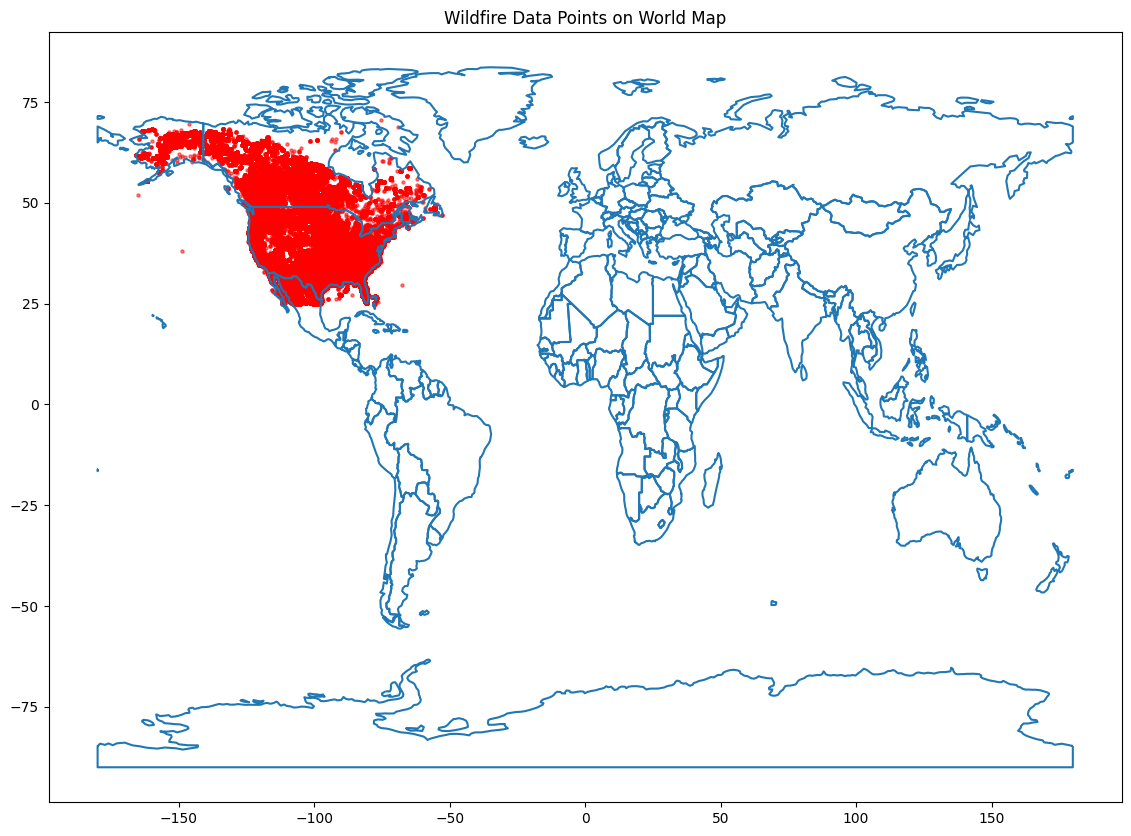

In [23]:
# Load a world map
world = gpd.read_file(naturalearth_lowres)

# Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Plot wildfire data points on the base map
geo_wfp.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Wildfire Data Points on World Map')
plt.show()

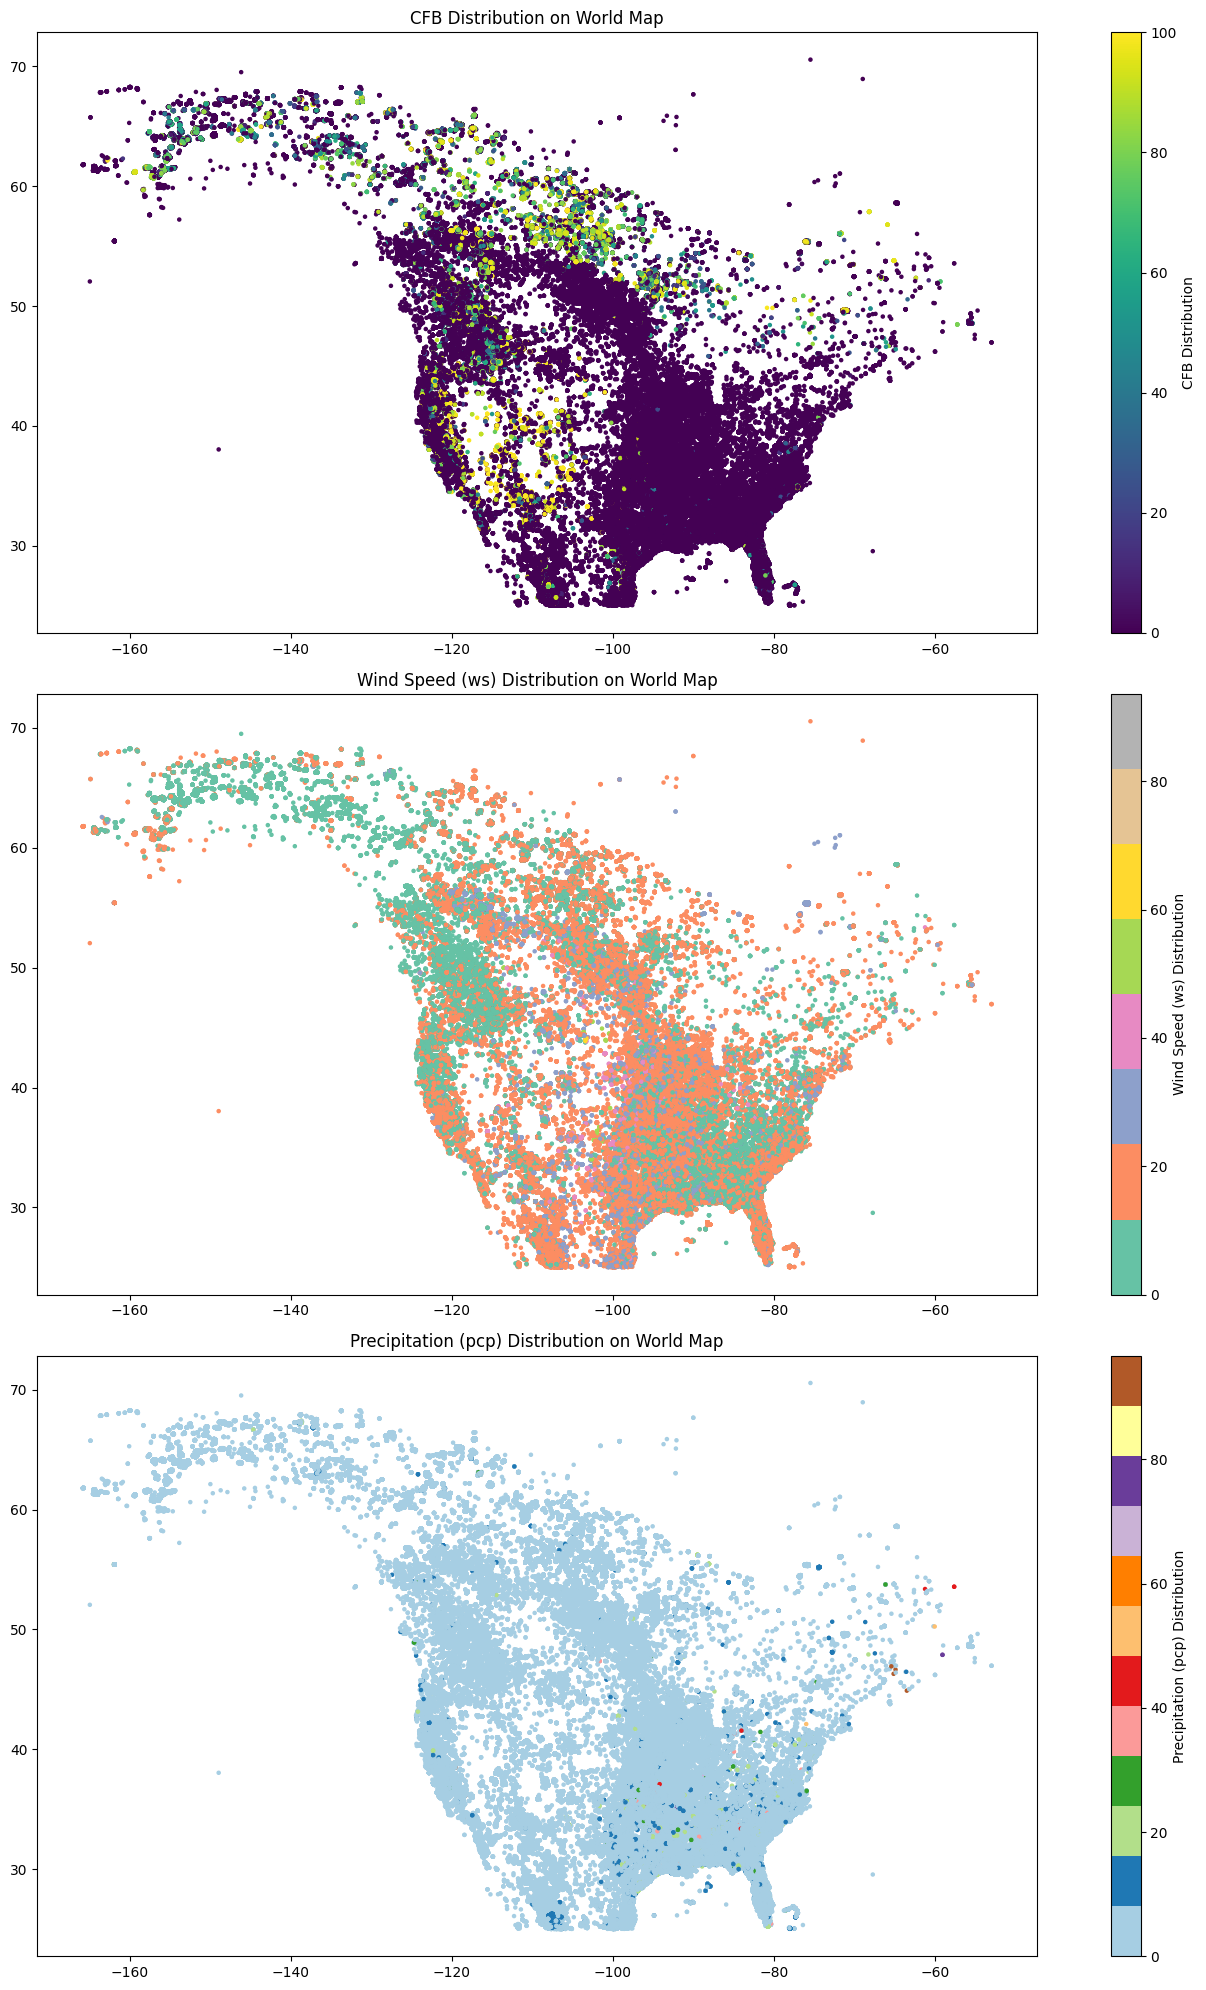

In [24]:
# Specific Visualizations for CFB, Wind Speed, and Precipitation
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# CFB Distribution
geo_wfp.plot(column='cfb', ax=axes[0], legend=True, legend_kwds={'label': "CFB Distribution"}, cmap='viridis', markersize=5)
axes[0].set_title('CFB Distribution on World Map')

# Wind Speed (ws) Distribution
geo_wfp.plot(column='ws', ax=axes[1], legend=True, legend_kwds={'label': "Wind Speed (ws) Distribution"}, cmap='Set2', markersize=5)
axes[1].set_title('Wind Speed (ws) Distribution on World Map')

# Precipitation (pcp) Distribution
geo_wfp.plot(column='pcp', ax=axes[2], legend=True, legend_kwds={'label': "Precipitation (pcp) Distribution"}, cmap='Paired', markersize=5)
axes[2].set_title('Precipitation (pcp) Distribution on World Map')

plt.tight_layout()
plt.show()

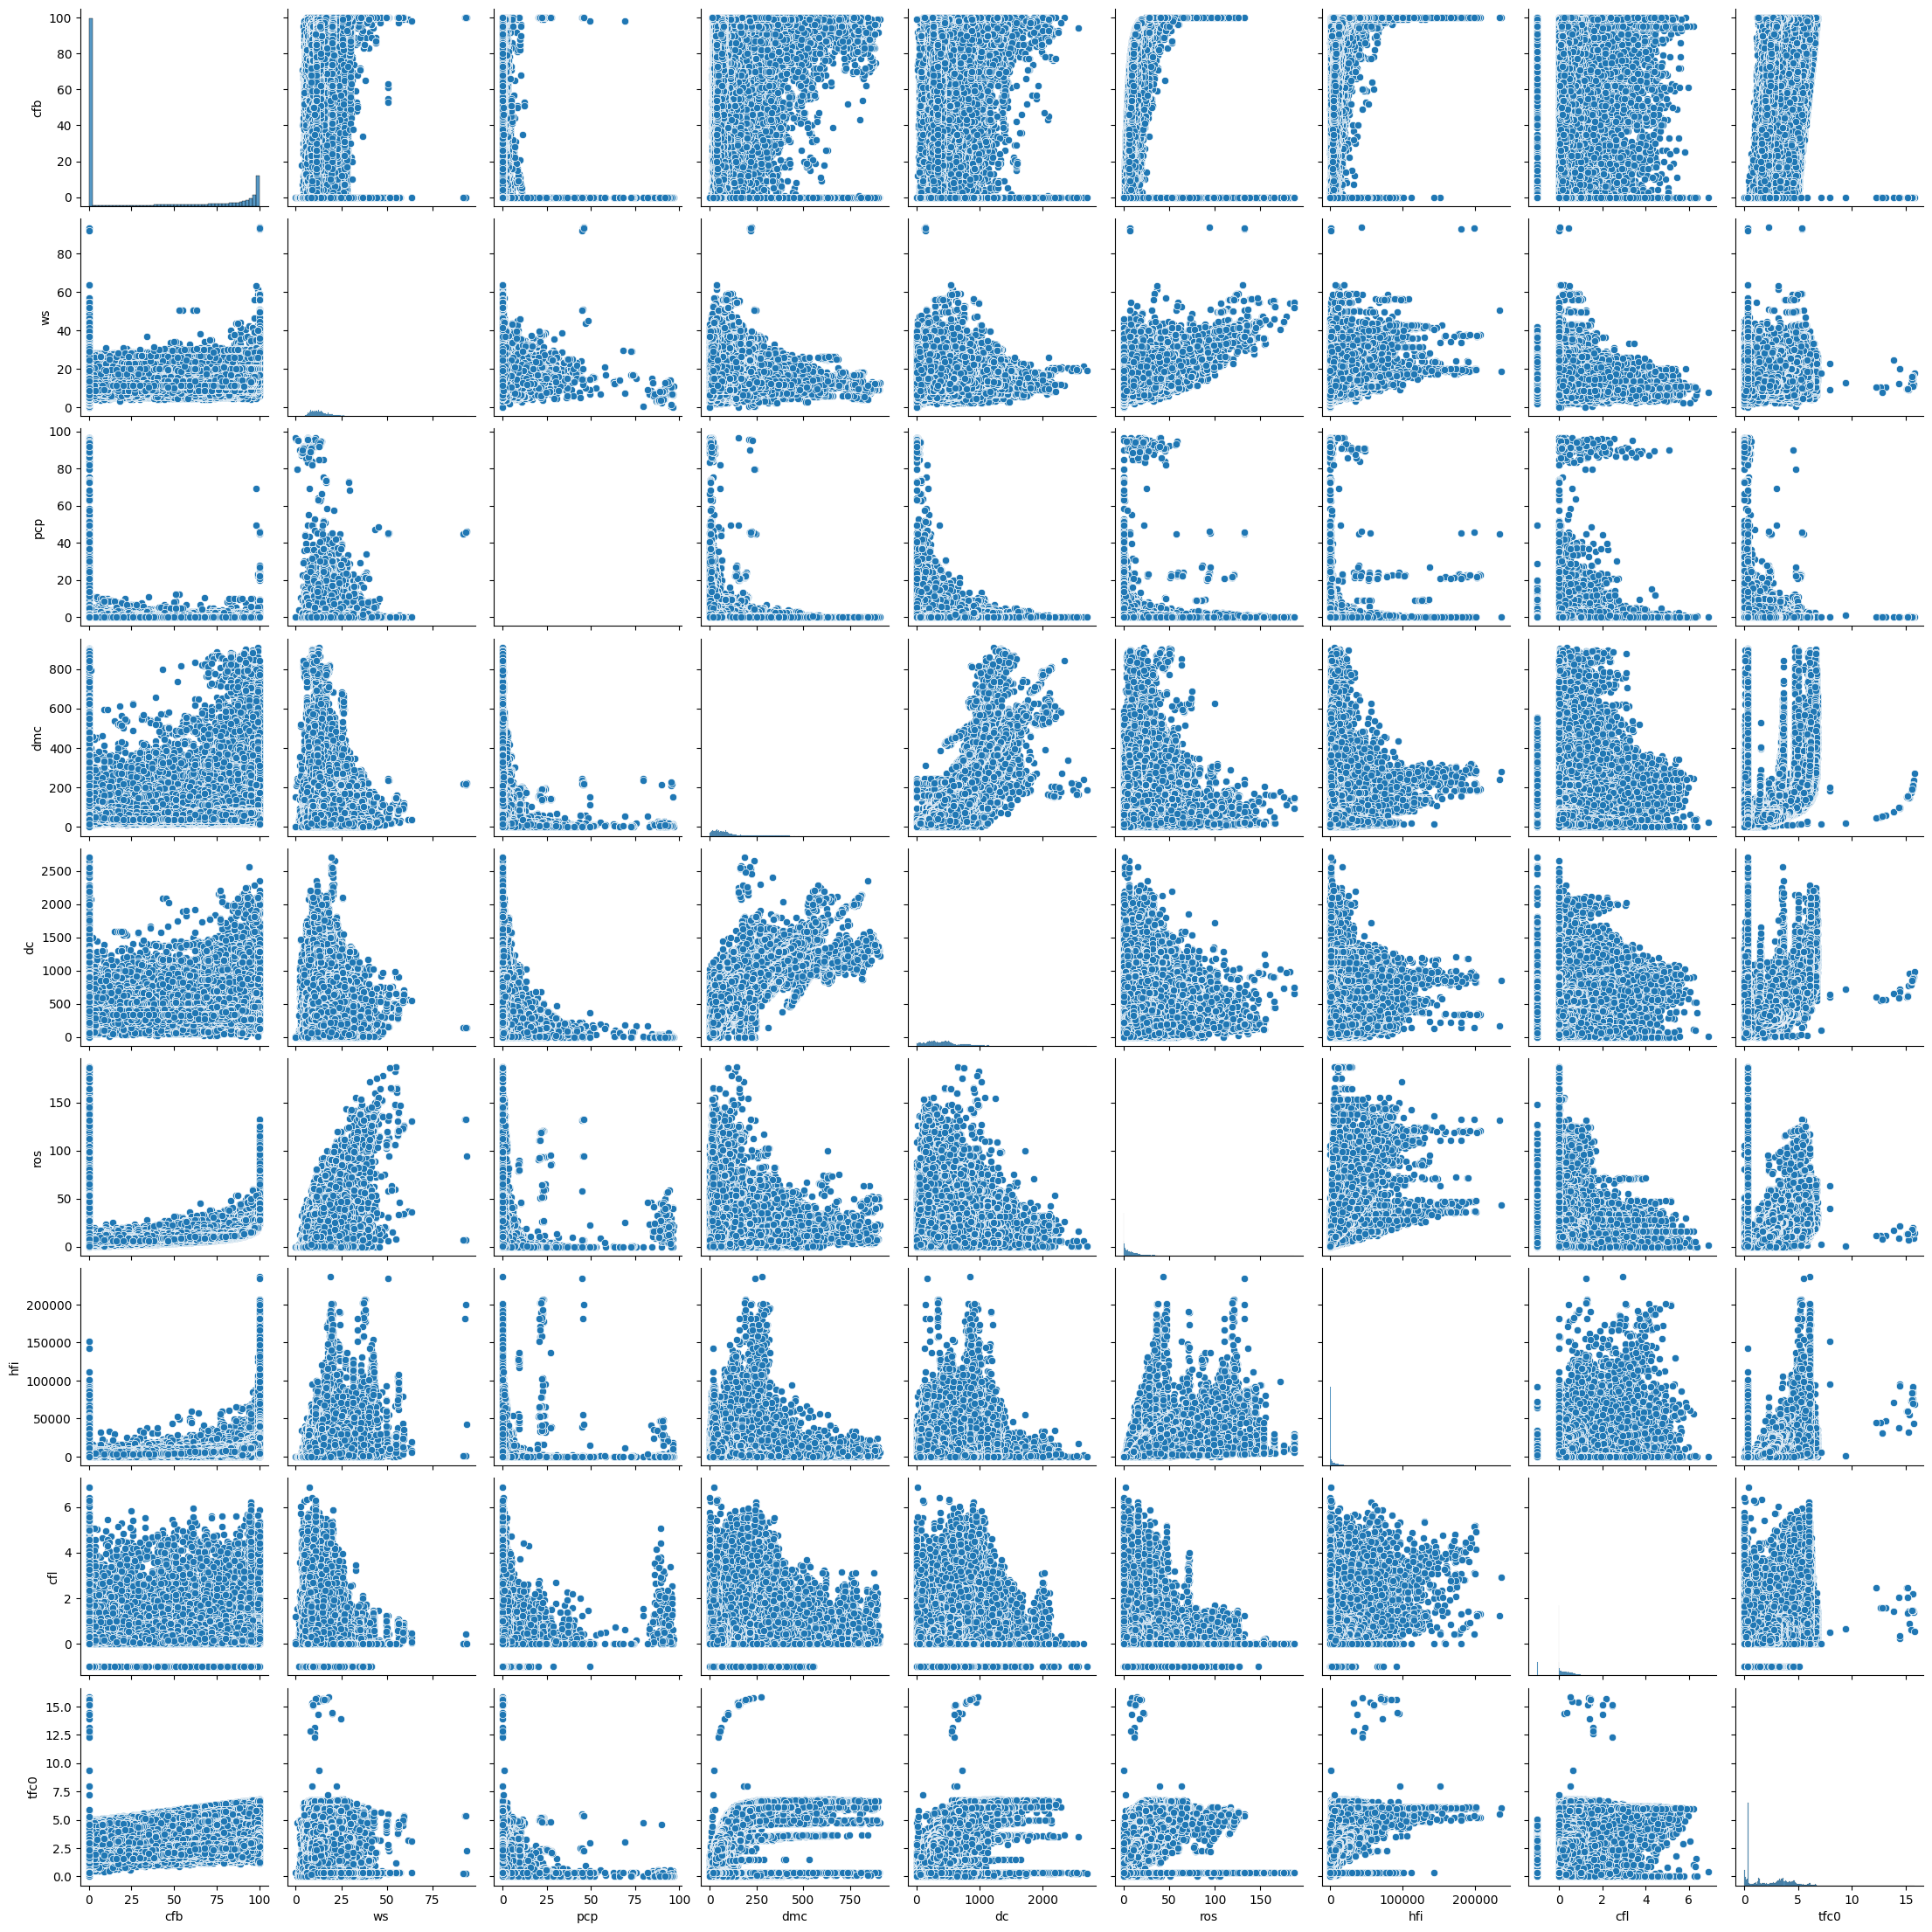

In [25]:
# Pairplot using Seaborn to see relationships between features and the target variable
pairplot_columns = ['cfb', 'ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']
sns.pairplot(geo_wfp[pairplot_columns])
plt.show()

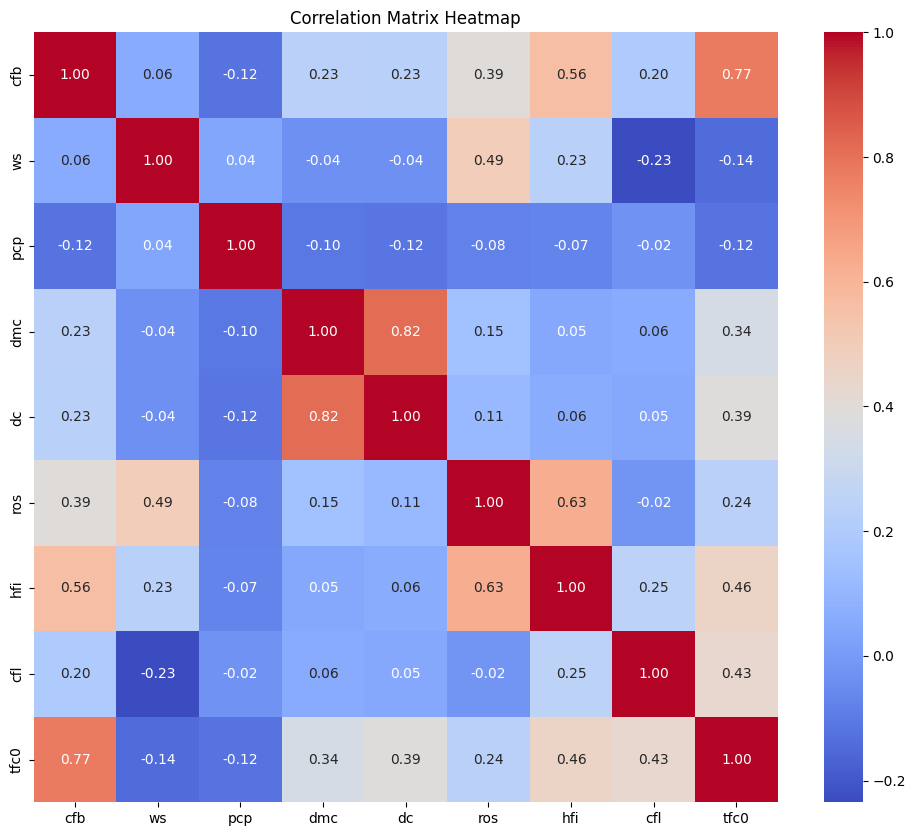

In [26]:
# Heatmap for Multicollinearity
plt.figure(figsize=(12, 10))
corr_matrix = geo_wfp[pairplot_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
geo_wfp.head(5)

_id      lat       lon            rep_date source  \
0  6669b15b44a41007063ba9da  62.1163 -161.8260 2020-06-02 12:54:00  NASA4   
1  6669b15e44a41007063ba9db  61.6291 -164.4490 2020-06-11 12:36:00  NASA5   
2  6669b15e44a41007063ba9dc  47.4740  -69.9380 2020-06-20 06:30:00   USFS   
3  6669b15e44a41007063ba9dd  32.3920 -110.8040 2020-06-22 08:24:00  NASA6   
4  6669b15e44a41007063ba9de  33.4720  -91.3332 2020-06-13 07:06:00  NASA7   

  sensor satellite agency    temp  rh  ...  day  dayofweek  dayofyear  \
0  IBAND     S-NPP    UAK  15.917  69  ...    2          1        154   
1  IBAND   NOAA-20    UAK  26.064  52  ...   11          3        163   
2  IBAND     JPSS1     QC  24.666  54  ...   20          5        172   
3  IBAND     S-NPP    UAZ  32.754  11  ...   22          0        174   
4  IBAND   NOAA-20    UAR  31.359  37  ...   13          5        165   

   weekofyear  quarter  hour   lat_sin   lat_cos   lon_sin   lon_cos  
0          23        2    12  0.883899  0.467678 -0.311904 -0.950114  
1          24        2    12  0.879890  0.475177 -0.268096 -0.963392  
2          25        2     6  0.736971  0.675925 -0.939322  0.343037  
3          26        2     8  0.535709  0.844403 -0.934801 -0.355172  
4          24        2     7  0.551529  0.834155 -0.999729 -0.023267  

[5 rows x 47 columns]

In [28]:
geo_wfp.shape

(450342, 47)

In [ ]:
# Save the featured engineering data to mongodb
# dbu.insert_dataframe_to_mongodb(geo_wfp, os.getenv('COLLECTION_NAME_FEATUREENGINEERED'))
